In [43]:
from thesis import SAVED_RESULTS_PATH
from typing import List, Optional
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from thesis import ROOT


BASELINE_METRICS = ['DEGs', 'r2mean_all_boostrap_mean', 'r2mean_top20_boostrap_mean', 'r2mean_top100_boostrap_mean']
DISTANCE_METRICS = ['edistance', 'wasserstein', 'euclidean', 'mean_pairwise', 'mmd']

FIGURES_PATH = SAVED_RESULTS_PATH / "multi_task_aae_eval" / "figures"

In [48]:
all_df = pd.read_csv(ROOT / "analysis" / "multi_task_aae.csv")
all_df_overview = pd.read_csv(ROOT / "analysis" / "multi_task_aae_overview.csv")

METRICS_DF = all_df
METRICS_DF_OVERVIEW = all_df_overview
EXPERIMENTS = ['combine_reconstruction_generator_loss_3', 'loss_g_subtract_loss_d']

In [45]:
def _plot_2d_metrics(
    dataset: DataFrame,
    title: str,
    x_labels: List[str],
    metrics: List[str] = BASELINE_METRICS,
    experiments=EXPERIMENTS,
    file_name_to_save: Optional[str] = None,
):
    x = np.arange(len(x_labels))
    width = 0.1
    
    nrows = int(np.ceil(len(metrics) / 2))

    fig, axes = plt.subplots(nrows, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        ax = axes[i]

        start = -(len(experiments) // 2)
        start = start if len(experiments) % 2 != 0 else start - 1
        end = len(experiments) // 2
        x_bars = [x + i * width for i in range(start, end + 1, 1)]
        for experiment, x_bar in zip(experiments, x_bars):
            ax.bar(
                x_bar,
                dataset[dataset["experiment"] == experiment][metric],
                width,
                label=experiment,
                alpha=0.7,
            )

        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha="right")
        ax.set_ylabel(metric)
        # ax.set_title(f"Comparison of {metric}")
        
    if len(metrics) % 2 != 0:
        fig.delaxes(axes[-1])

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)
    fig.suptitle(title)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    if file_name_to_save:
        plt.savefig(
            FIGURES_PATH / f"{file_name_to_save}.pdf", dpi=300, bbox_inches="tight"
        )
    plt.show()


def plot_2d_metrics_per_dosage(
    dataset_pipeline: str,
    title: str,
    cell_type: str,
    perturbation: Optional[str] = None,
    experiments=EXPERIMENTS,
    file_name_to_save: Optional[str] = None,
    metrics=BASELINE_METRICS
):
    #dataset = METRICS_DF[METRICS_DF["dataset"] == dataset_pipeline]
    dataset = METRICS_DF
    dataset = dataset[dataset["cell_type_test"] == cell_type].sort_values("dose")
    dosages = sorted(
        dataset["dose"].unique().tolist()
    )  # dataset['dose'].unique().tolist()
    assert len(dosages) > 1
    _plot_2d_metrics(
        dataset=dataset,
        title=title,
        x_labels=dosages,
        experiments=experiments,
        file_name_to_save=file_name_to_save,
        metrics=metrics
    )
    
def plot_2d_metrics_per_dosage_overview(cell_type_test: str):
    dataset = METRICS_DF_OVERVIEW
    _plot_2d_metrics(
        dataset=dataset,
        title="",
        x_labels=[f'{cell_type_test}'],
        metrics=BASELINE_METRICS,
        experiments=['dosage_30']
    )


def plot_2d_metrics_per_cell_type(
    dataset_pipeline: str,
    title: str,
    dosage: Optional[float] = None,
    perturbation: Optional[str] = None,
    experiments=EXPERIMENTS,
    file_name_to_save: Optional[str] = None,
    metrics=BASELINE_METRICS
):
    dataset = METRICS_DF[METRICS_DF["dataset"] == dataset_pipeline]
    if dosage is not None:
        dataset = dataset[dataset["dose"] == dosage]
    if perturbation is not None:
        dataset = dataset[dataset["perturbation"] == perturbation]

    dataset = dataset.sort_values("cell_type_test")
    cell_types = sorted(dataset["cell_type_test"].unique().tolist())
    _plot_2d_metrics(
        dataset=dataset,
        title=title,
        x_labels=cell_types,
        experiments=experiments,
        file_name_to_save=file_name_to_save,
        metrics=metrics
    )

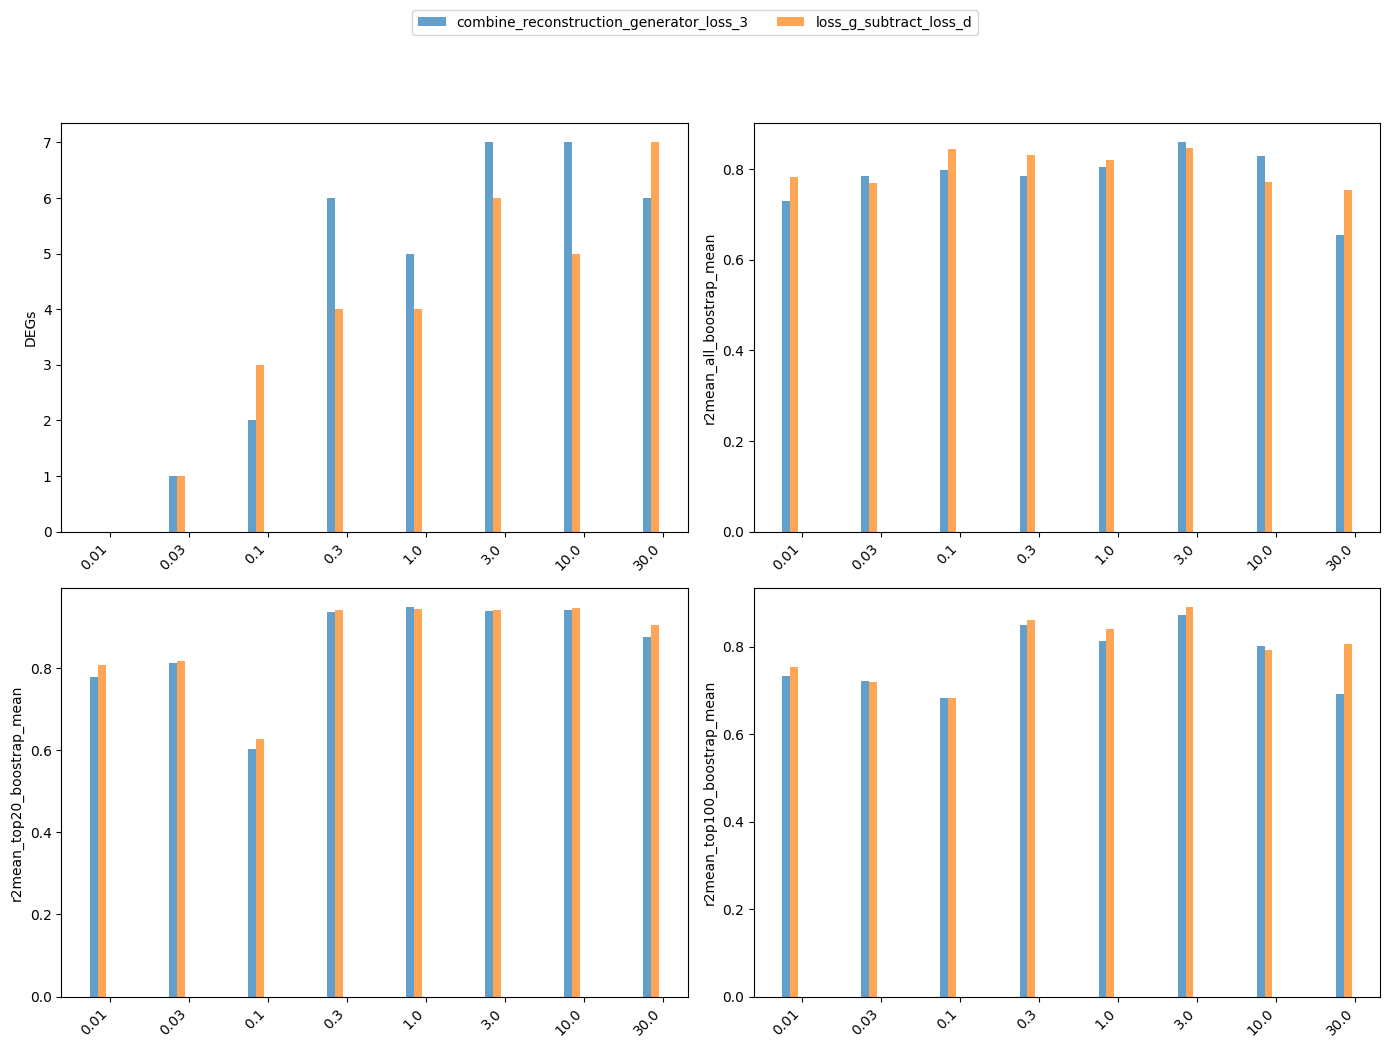

In [46]:
plot_2d_metrics_per_dosage(dataset_pipeline='', cell_type='Hepatocytes - portal', title="")


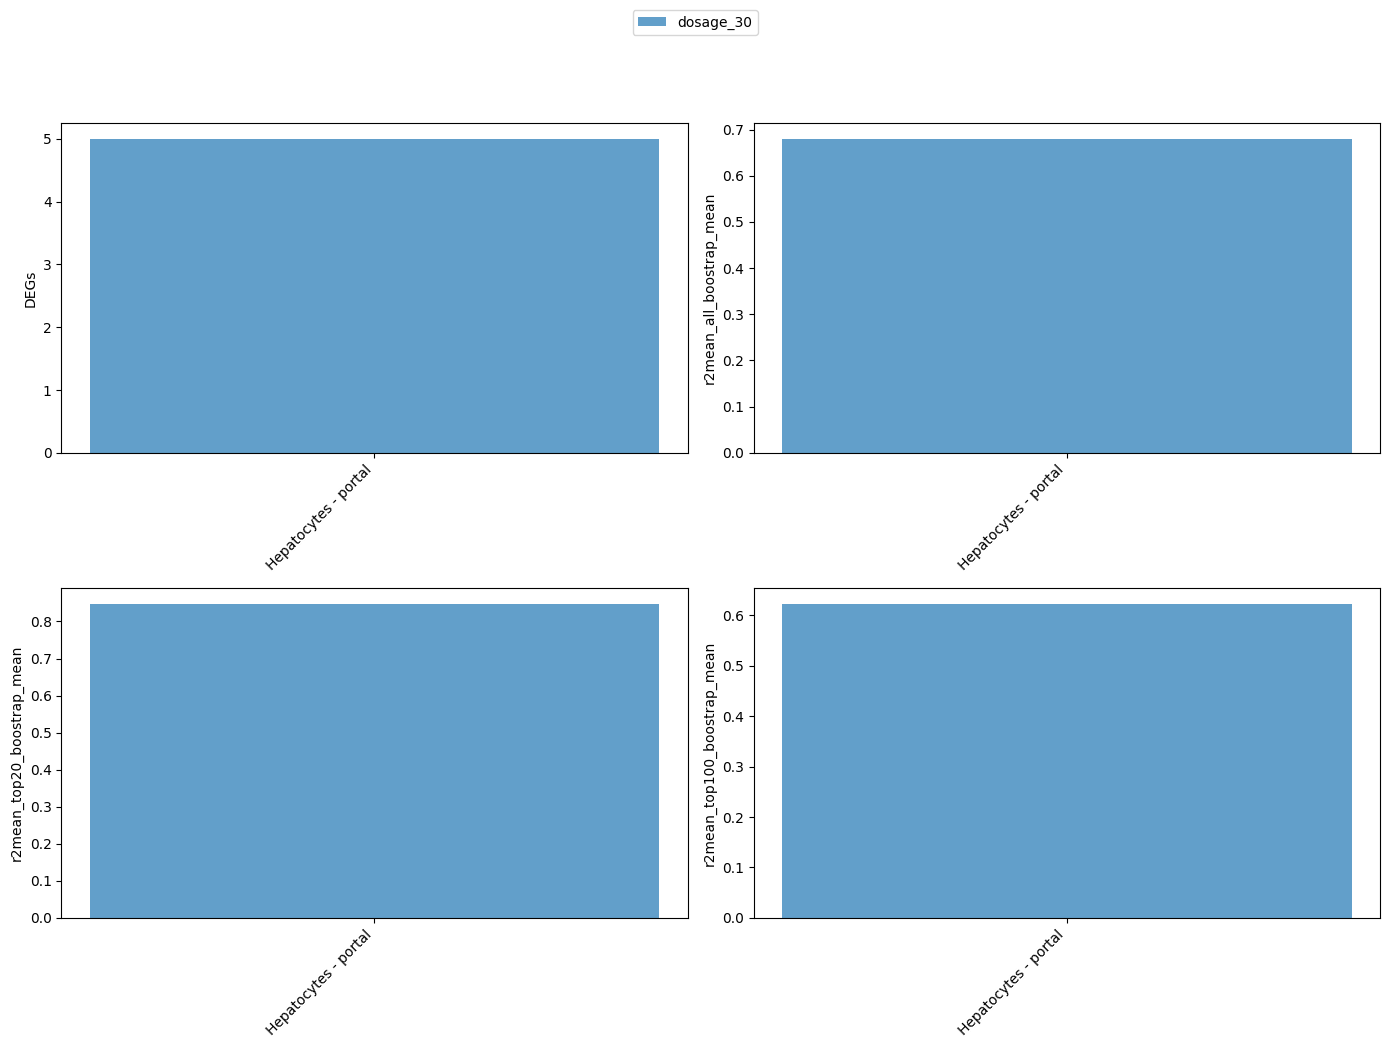

In [47]:
plot_2d_metrics_per_dosage_overview(cell_type_test='Hepatocytes - portal')